In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers

print("TensorFlow ", tf.__version__)
print("Keras", keras.__version__)

In [ ]:
# GPU check
gpu_device = tf.test.gpu_device_name()
if gpu_device:
    print(f'GPU {gpu_device}')
else:
    print('No GPU')

# Tensorflow API

In [ ]:
x = np.array(1) # 스칼라
print(f'x={x}, 차원={x.ndim}, 형상={x.shape}')

x1 = np.array([1, 2, 3]) # 벡터
print(f'x1={x1}, 차원={x1.ndim}, 형상={x1.shape}')

x2 = np.array([[1, 2, 3], [4, 5, 6]]) # 행렬
print(f'x2={x2}, 차원={x2.ndim}, 형상={x2.shape}')

x3 = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]) # 3차원 텐서
print(f'x3={x3}, 차원={x3.ndim}, 형상={x3.shape}')

In [ ]:
x = tf.constant(1) # 스칼라
print(f'x={x}, 차원={x.ndim}, 형상={x.shape}')

x1 = tf.constant([1, 2, 3]) # 벡터
print(f'x1={x1}, 차원={x1.ndim}, 형상={x1.shape}')

x2 = tf.constant([[1, 2, 3], [4, 5, 6]]) # 행렬
print(f'x2={x2}, 차원={x2.ndim}, 형상={x2.shape}')

x3 = tf.constant([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]) # 3차원 텐서
print(f'x3={x3}, 차원={x3.ndim}, 형상={x3.shape}')

## 경사 하강

In [ ]:
x = np.linspace(-5, 5, 100)
f = lambda x: x ** 2
# 미분을 구하는 2가지 방법이 있는데 수치미분과 해석미분이 있습니다.
dydx = lambda x: 2 * x # 해석미분: 기호를 기반으로 미분을 수행합니다

plt.figure(figsize=(3, 2))
plt.plot(x, f(x))
x = -4
plt.plot(x , f(x), 'ro')
"""
경사하강: 신경망에서 에폭을 반복한다는 것은 경사 하강을 반복적으로 수행한다는 의미입니다.
경사 하강으로 손실을 한 번에 줄이는 것이 불가능 하기 때문에 여러번 반복적으로 수행 하는 것이 필요합니다
경사 하강은 근사적인 해법 입니다. 즉, 최적해를 찾는 것이 아니라 최적해에 가까운 해를 찾는 것입니다.
"""
학습률 = 0.1
for 에폭 in range(10):
    x = x - dydx(x) * 학습률
    plt.plot(x , f(x), 'ro')
plt.show()

In [ ]:
f = lambda x: x ** 2

# 자동미분: 해석적 미분을 우리가 직접 수행하지 않습니다. 대신 텐서플로우가 자동으로 미분을 수행합니다.
학습률 = 0.1
x  = tf.Variable(-4.0)
print(f'x={x.numpy():.2f}, dydx={dydx}, f(x)={f(x):.2f}')

for 에폭 in range(10):
    with tf.GradientTape() as tape:
        y = f(x)
    dydx = tape.gradient(y, x)
    x.assign_sub(dydx * 학습률)
    print(f'x={x.numpy():.2f} -> f(x)={f(x):.2f}')

## 선형 회귀

In [ ]:
class TFLinearRegression:
    def __init__(self):
        self.w = None
        self.b = None

    def __call__(self, Xs):
        Xs = tf.constant(Xs, dtype=tf.float32)
        # y = Xw + b
        return tf.matmul(Xs, tf.expand_dims(self.w, axis=-1)) + self.b
    
    def fit(self, Xs, ys, epochs, 학습률):
        Xs = tf.constant(Xs, dtype=tf.float32)
        ys = tf.constant(ys, dtype=tf.float32)
        # 매개변수 초기화
        특성차원 = Xs.shape[1]
        self.w = tf.Variable(tf.random.normal(shape=(특성차원,)), dtype=tf.float32)
        self.b = tf.Variable(0.0, dtype=tf.float32)
        # 최적화 (경사하강법)
        loss_history = []
        for _ in range(epochs):
            # 경사 산출
            with tf.GradientTape() as tape:
                outputs = self(Xs)
                # 손실함수: MSE
                loss = tf.reduce_mean(tf.square(tf.squeeze(outputs) - ys))
                loss_history.append(loss.numpy())
            # 경사 계산
            dw, db = tape.gradient(loss, [self.w, self.b])
            # 경사 하강: W = W - lr * dL/dW
            self.w.assign_sub(dw * 학습률)
            self.b.assign_sub(db * 학습률)
        return loss_history

In [ ]:
from sklearn.linear_model import LinearRegression # 선형회귀

random = np.random.RandomState(1) # 난수 초기값 설정
xs = np.linspace(-5, 5, 100)
noise = random.randn(len(xs))
ys = xs + noise

Xs = xs.reshape(-1, 1) # 2차원 배열로 변환
model = LinearRegression()
model.fit(Xs, ys)
print(f'w={model.coef_[0]:.2f}, b={model.intercept_:.2f}')

model_2 = TFLinearRegression()
loss_history = model_2.fit(Xs, ys, epochs=100, 학습률=0.1)

plt.scatter(xs, ys)
plt.plot(xs, ys - noise, 'r--') # 이상적 추세선
plt.plot(xs, model.predict(Xs), 'k') # 회귀선
plt.plot(xs, model_2(Xs), 'y--') # 텐서플로우 회귀선
plt.show()

# Keras API

In [ ]:
from keras import layers

# 선형 회귀
with tf.device('cpu'):
    model = keras.Sequential([
        layers.Dense(units=1, input_shape=[1])
    ])
    model.compile(
        loss=keras.losses.mean_squared_error, 
        optimizer=keras.optimizers.SGD(learning_rate=0.1))
    history = model.fit(Xs, ys, epochs=10, batch_size=len(Xs))

plt.scatter(xs, ys)
plt.plot(xs, ys - noise, 'r--')
plt.plot(xs, model(Xs), 'k')
plt.show()

In [ ]:
계층목록 = [
    layers.Dense(64, activation='relu'), # 1층
    layers.Dense(10, activation='softmax') # 2층 (출력층)
]
model = keras.Sequential(계층목록)

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(100,), name='FC1'))
model.add(layers.Dense(10, activation='softmax', name='FC2'))
# model.build(input_shape=(None, 100))
model.summary()

In [ ]:
for param in model.weights:
    print(f'{param.name}, {param.shape}')

## Functional API

신경망의 구성이 비순차적인(Non Sequential) 경우에는 함수형 API를 통해서 신경망을 구성해야 합니다.

In [ ]:
inputs = keras.Input(shape=(100,), name='input')
inputs2 = keras.Input(shape=(100,), name='input2')

layer1 = layers.Dense(64, activation='relu', name='FC1')
outputs1 = layers.Dense(10, activation='softmax', name='outputs1')
outputs2 = layers.Dense(1, name='outputs2')

In [ ]:
x = layers.Concatenate()([inputs, inputs2])
x = layer1(x)
y1 = outputs1(x)
y2 = outputs2(x)

model = keras.Model(inputs=[inputs, inputs2], outputs=[y1, y2])
model.summary()

### 다중 입력, 다중 출력 응용 설계 예시

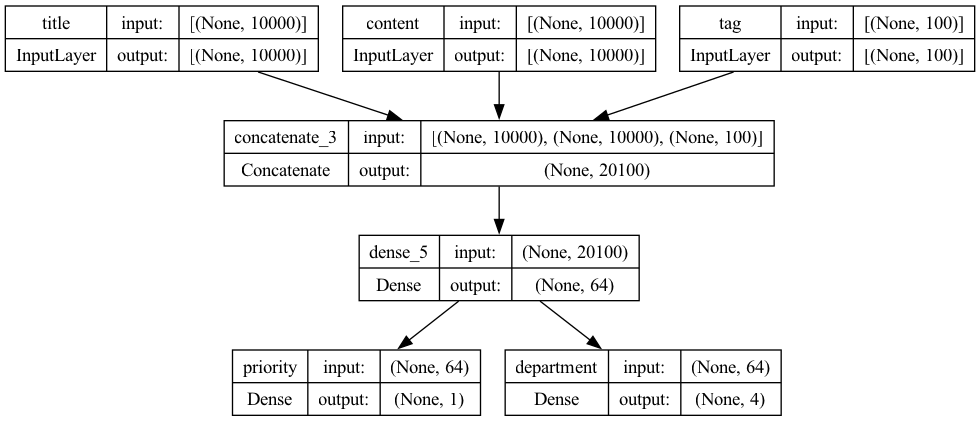

In [17]:
어휘수 = 10000
태그수 = 100
부서수 = 4

제목 = keras.Input(shape=(어휘수,), name='title')
내용 = keras.Input(shape=(어휘수,), name='content')
태그 = keras.Input(shape=(태그수,), name='tag')

x = layers.Concatenate()([제목, 내용, 태그])
x = layers.Dense(64, activation='relu')(x)

중요도 = layers.Dense(1, activation='sigmoid', name='priority')(x)
부서 = layers.Dense(4, activation='softmax', name='department')(x)

model = keras.Model(inputs=[제목, 내용, 태그], outputs=[중요도, 부서])
# model.summary()
keras.utils.plot_model(model, show_shapes=True)

# 합성곱 신경망

In [23]:
fashion_mnist_data = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data

assert (28, 28) == train_images.shape[1:] == test_images.shape[1:]
assert set(range(10)) == set(train_labels) == set(test_labels)
assert len(train_images) == len(train_labels)
assert len(test_images) == len(test_labels)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_vector (InputLayer)   [(None, 784)]             0         
                                                                 
 FC0 (Dense)                 (None, 64)                50240     
                                                                 
 FC1 (Dense)                 (None, 64)                4160      
                                                                 
 outputs (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


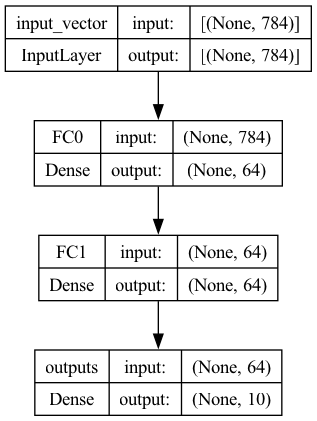

In [35]:
def MLP공장(inputs, hidden_units):
    x = inputs
    for 계층번호, units in enumerate(hidden_units):
        x = layers.Dense(units, activation='relu', name=f'FC{계층번호}')(x)
    outputs = layers.Dense(10, activation='softmax', name='outputs')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

inputs = keras.Input(shape=(784,), name='input_vector')
model = MLP공장(inputs, [64, 64])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [26]:
def 전처리(images, 목표형상):
    Xs = images.reshape(-1, *목표형상)
    Xs = Xs.astype('float32')
    # 단위 정규화: 0 ~ 1 사이로 정규화
    Xs /= 255
    return Xs

목표형상 = (784,)
X_train = 전처리(train_images, 목표형상)
X_test = 전처리(test_images, 목표형상)
assert 목표형상 == X_train.shape[1:] == X_test.shape[1:]

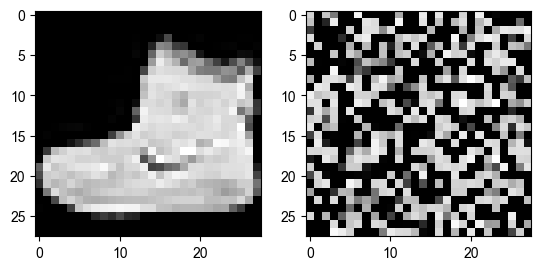

In [41]:
# 픽셀를 무작위로 섞기
픽셀순서 = np.random.permutation(784)
XR_train = X_train[:, 픽셀순서]
XR_test = X_test[:, 픽셀순서]
# 원본, 무작위 시각화
plt.subplot(121)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.subplot(122)
plt.imshow(XR_train[0].reshape(28, 28), cmap='gray')
plt.show()

In [42]:
inputs = keras.Input(shape=목표형상, name='input_vector')
with tf.device('cpu'):
    model = MLP공장(inputs, [64, 64])
    model.compile(
        loss=keras.losses.sparse_categorical_crossentropy,
        optimizer=keras.optimizers.SGD(learning_rate=0.1), 
        # 추가 지표: 손실 함수는 무조건 출력이 되는데, 
        # 손실 이외에도 다른 것들을 같이 보고자 할 경우 추가적으로 설정이 가능합니다
        metrics=['accuracy'])
    history = model.fit(
        XR_train, train_labels, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.7061 - accuracy: 0.7499 - val_loss: 0.5407 - val_accuracy: 0.8079
Epoch 2/10
375/375 [==============================] - 1s 1ms/step - loss: 0.4732 - accuracy: 0.8313 - val_loss: 0.4498 - val_accuracy: 0.8349
Epoch 3/10
375/375 [==============================] - 1s 1ms/step - loss: 0.4233 - accuracy: 0.8468 - val_loss: 0.4180 - val_accuracy: 0.8492
Epoch 4/10
375/375 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8567 - val_loss: 0.4109 - val_accuracy: 0.8478
Epoch 5/10
375/375 [==============================] - 1s 1ms/step - loss: 0.3755 - accuracy: 0.8634 - val_loss: 0.3936 - val_accuracy: 0.8557
Epoch 6/10
375/375 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8691 - val_loss: 0.3602 - val_accuracy: 0.8698
Epoch 7/10
375/375 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8741 - val_loss: 0.3775 - val_accuracy: 0.8637
Epoch 

In [46]:
def 훈련결과표생성(history):
    훈련결과표 = pd.DataFrame(history.history)
    훈련결과표['epoch'] = np.array(history.epoch) + 1
    훈련결과표.set_index('epoch', inplace=True)
    return 훈련결과표

In [44]:
def 합성곱공장(inputs):
    x = inputs
    # 합성곱 계층
    x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
    # 출력층
    x = layers.Flatten()(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

inputs = keras.Input(shape=(28, 28, 1), name='input_image')
model = 합성곱공장(inputs)
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense_17 (Dense)            (None, 10)                216330    
                                                                 
Total params: 216650 (846.29 KB)
Trainable params: 216650 (846.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
def LeNet공장(inputs):
    x = inputs
    x = layers.Conv2D(6, kernel_size=(5, 5), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    # 출력 블럭
    x = layers.Flatten()(x)
    x = layers.Dense(120, activation='relu')(x)
    x = layers.Dense(84, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

inputs = keras.Input(shape=(28, 28, 1), name='input_image')
model = LeNet공장(inputs)
model.summary()


Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 400)               0  

In [58]:
목표형상 = (28, 28, 1)
X_train = 전처리(train_images, 목표형상)
X_test = 전처리(test_images, 목표형상)
assert 목표형상 == X_train.shape[1:] == X_test.shape[1:]

inputs = keras.Input(shape=목표형상, name='input_images')
with tf.device('cpu'):
    model = LeNet공장(inputs)
    model.compile(
        loss=keras.losses.sparse_categorical_crossentropy,
        optimizer=keras.optimizers.SGD(learning_rate=0.1),
        # 추가 지표: 손실 함수는 무조건 출력이 되는데, 
        # 손실 이외에도 다른 것들을 같이 보고자 할 경우 추가적으로 설정이 가능합니다
        metrics=['accuracy'])
    history = model.fit(
        X_train, train_labels, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.8663 - accuracy: 0.6785 - val_loss: 0.5444 - val_accuracy: 0.7882
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.4758 - accuracy: 0.8232 - val_loss: 0.4230 - val_accuracy: 0.8456
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.4027 - accuracy: 0.8526 - val_loss: 0.4005 - val_accuracy: 0.8520
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3625 - accuracy: 0.8661 - val_loss: 0.3634 - val_accuracy: 0.8603
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.3364 - accuracy: 0.8775 - val_loss: 0.3758 - val_accuracy: 0.8619
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3159 - accuracy: 0.8829 - val_loss: 0.3231 - val_accuracy: 0.8817
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3014 - accuracy: 0.8885 - val_loss: 0.3244 - val_accuracy: 0.8807

In [59]:
훈련결과표 = 훈련결과표생성(history)
훈련결과표.round(3)[-3:]

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
8,0.289,0.892,0.304,0.887
9,0.276,0.897,0.297,0.892
10,0.265,0.902,0.307,0.890


추가 훈련

In [60]:
with tf.device('cpu'):
    history2 = model.fit(
        X_train, train_labels, batch_size=128, epochs=20, initial_epoch=10,
        validation_split=0.2)

Epoch 11/20
375/375 [==============================] - 5s 13ms/step - loss: 0.2555 - accuracy: 0.9046 - val_loss: 0.3000 - val_accuracy: 0.8904
Epoch 12/20
375/375 [==============================] - 5s 15ms/step - loss: 0.2466 - accuracy: 0.9085 - val_loss: 0.2969 - val_accuracy: 0.8884
Epoch 13/20
375/375 [==============================] - 5s 15ms/step - loss: 0.2397 - accuracy: 0.9102 - val_loss: 0.2873 - val_accuracy: 0.8972
Epoch 14/20
375/375 [==============================] - 5s 13ms/step - loss: 0.2317 - accuracy: 0.9139 - val_loss: 0.2921 - val_accuracy: 0.8951
Epoch 15/20
375/375 [==============================] - 5s 13ms/step - loss: 0.2241 - accuracy: 0.9161 - val_loss: 0.2883 - val_accuracy: 0.8960
Epoch 16/20
375/375 [==============================] - 5s 13ms/step - loss: 0.2179 - accuracy: 0.9190 - val_loss: 0.2930 - val_accuracy: 0.8951
Epoch 17/20
375/375 [==============================] - 5s 14ms/step - loss: 0.2119 - accuracy: 0.9206 - val_loss: 0.2758 - val_accuracy:

In [61]:
훈련결과표2 = 훈련결과표생성(history2)
훈련결과표 = pd.concat([훈련결과표, 훈련결과표2])
훈련결과표.round(3)[-3:]

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
18,0.205,0.924,0.276,0.900
19,0.200,0.925,0.282,0.901
20,0.196,0.927,0.277,0.902


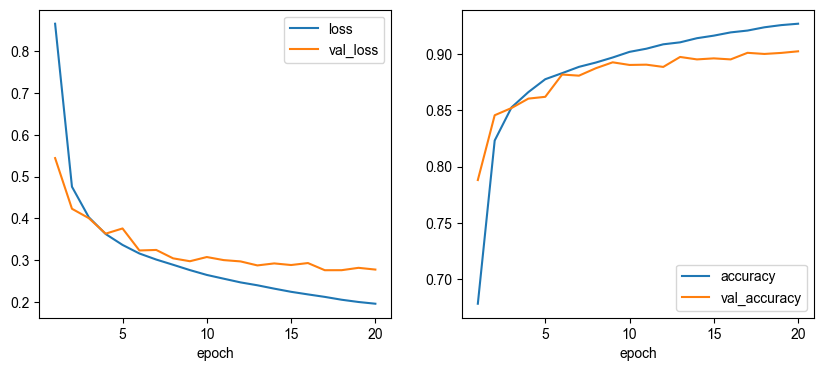

In [62]:
plt.figure(figsize=(10, 4))
ax = plt.subplot(121)
훈련결과표[['loss', 'val_loss']].plot(ax=ax)
ax = plt.subplot(122)
훈련결과표[['accuracy', 'val_accuracy']].plot(ax=ax)
plt.show()

## 개냥이 프로젝트

In [75]:
이미지크기 = (180, 180)
train_dataset = keras.utils.image_dataset_from_directory(
    'data/cats_dogs_small/train',
    image_size=이미지크기,
    batch_size=32)

val_dataset = keras.utils.image_dataset_from_directory(
    'data/cats_dogs_small/validation',
    image_size=이미지크기,
    batch_size=32)

test_dataset = keras.utils.image_dataset_from_directory(
    'data/cats_dogs_small/test',
    image_size=이미지크기,
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [66]:
for X_batch, y_batch in train_dataset:
    print(X_batch.shape, y_batch.shape)
    break

(32, 180, 180, 3) (32,)


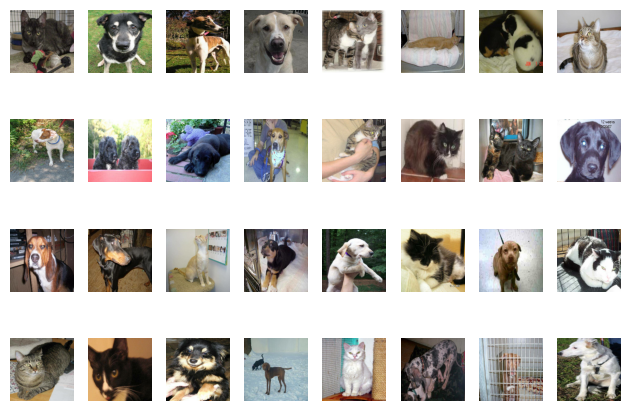

In [73]:
그림틀, 영역 = plt.subplots(4, 8)
for xi, 그래프 in zip(X_batch, 영역.flat):
    이미지 = xi.numpy().astype('uint8')
    그래프.imshow(이미지)
    그래프.axis('off')

plt.tight_layout()
plt.show()

In [79]:
def 개냥이모델(inputs):
    x = inputs
    # 전처리
    x = layers.Rescaling(1/255)(x)
    # 합성곱
    x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(128, 3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(256, 3, activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(256, 3, activation='relu')(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    return model

with tf.device('cpu'):
    inputs = keras.Input(shape=(이미지크기) + (3,))
    model = 개냥이모델(inputs)
    # model.summary()
    model.compile(
        loss=keras.losses.binary_crossentropy, # 이진 분류
        optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
        metrics=['acc'])
    history = model.fit(
        train_dataset, epochs=30, validation_data=val_dataset, 
        callbacks=[keras.callbacks.ModelCheckpoint(
            'cat_dog.keras', save_best_only=True)])

Epoch 1/30
63/63 [==============================] - 35s 549ms/step - loss: 0.6952 - acc: 0.5030 - val_loss: 0.6913 - val_acc: 0.6020
Epoch 2/30
63/63 [==============================] - 33s 514ms/step - loss: 0.6914 - acc: 0.5785 - val_loss: 0.6524 - val_acc: 0.6270
Epoch 3/30
63/63 [==============================] - 29s 460ms/step - loss: 0.6354 - acc: 0.6415 - val_loss: 0.6195 - val_acc: 0.6750
Epoch 4/30
63/63 [==============================] - 29s 459ms/step - loss: 0.5924 - acc: 0.6870 - val_loss: 0.5492 - val_acc: 0.7140
Epoch 5/30
63/63 [==============================] - 29s 454ms/step - loss: 0.5708 - acc: 0.7120 - val_loss: 0.5965 - val_acc: 0.6660
Epoch 6/30
63/63 [==============================] - 28s 451ms/step - loss: 0.5287 - acc: 0.7410 - val_loss: 0.8056 - val_acc: 0.6620
Epoch 7/30
63/63 [==============================] - 28s 446ms/step - loss: 0.4994 - acc: 0.7615 - val_loss: 0.5614 - val_acc: 0.7110
Epoch 8/30
63/63 [==============================] - 34s 539ms/step - 

KeyboardInterrupt: 

In [ ]:
# 훈련 결과
훈련결과표 = 훈련결과표생성(history)
